
# Chapter 2 
# Lab 2: Clustering


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from ISLP import load_data
from mlxtend.plotting import plot_pca_correlation_graph

We also collect the new imports
needed for this lab.

In [153]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP.cluster import (
    compute_linkage,
)  # necessite l'installation de l'environnement ISLP

## Exercise 2 : NCI60 Data
We work on the NCI60 cancer cell line microarray data, which
consists of 6830 gene expression measurements on 64 cancer cell lines as in Lab 1 and compare the result.

In [154]:
NCI60 = pd.read_csv("data/NCI60.csv", index_col=0)
NCI60

,0,1,2,3,4,5,6,7,8,9,...,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829
label,,,,,,,,,,,,,,,,,,,,,
CNS,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
CNS,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
CNS,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
RENAL,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
BREAST,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MELANOMA,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
MELANOMA,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
MELANOMA,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000


Each cell line is labeled with a cancer type. We do not make use of
the cancer types in performing clustering, as these are
unsupervised techniques. But after performing clustering, we
will check to see the extent to which these cancer types agree with
the results of these unsupervised techniques.
1. Analyse the data

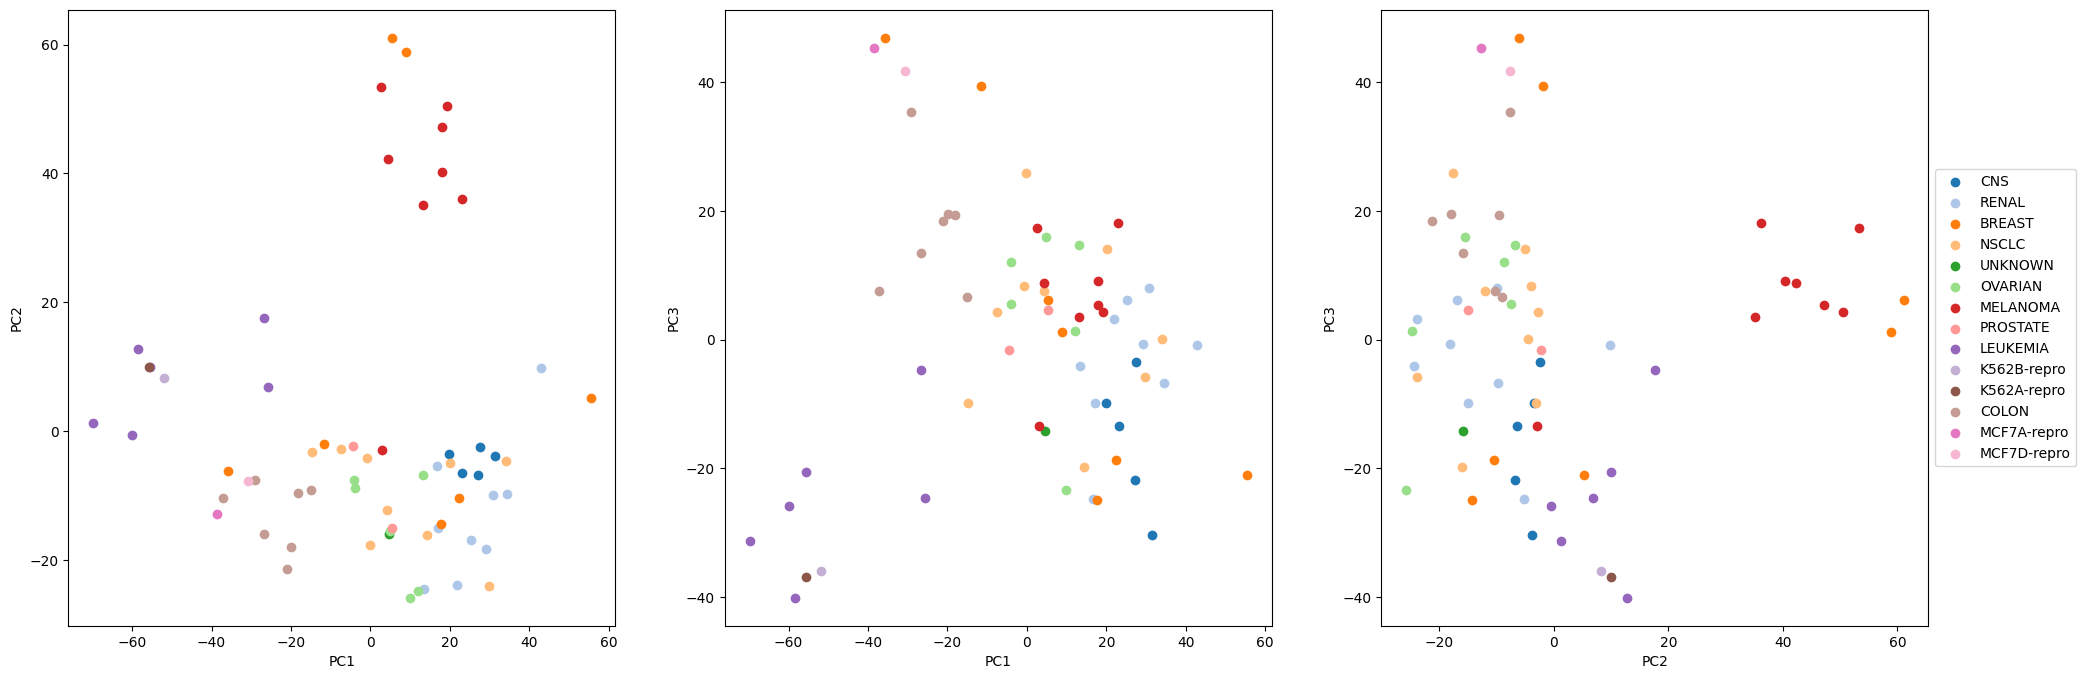

In [155]:
scaler = StandardScaler(with_std=True, with_mean=True)
NCI60_scaled = scaler.fit_transform(NCI60)
covariance_matrix = np.cov(NCI60_scaled, rowvar=False)

pcaNCI = PCA()
scores = pcaNCI.fit_transform(NCI60_scaled)

fig, ax = plt.subplots(1, 3, figsize=(24, 8))
colors = plt.get_cmap("tab20").colors
for i, label in enumerate(NCI60.index.unique()):
    indices = np.where(NCI60.index == label)[0]
    ax[0].scatter(
        scores[indices, 0],
        scores[indices, 1],
        color=colors[i],
        label=label,
    )
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
for i, label in enumerate(NCI60.index.unique()):
    indices = np.where(NCI60.index == label)[0]
    ax[1].scatter(
        scores[indices, 0],
        scores[indices, 2],
        color=colors[i],
        label=label,
    )
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC3")
for i, label in enumerate(NCI60.index.unique()):
    indices = np.where(NCI60.index == label)[0]
    ax[2].scatter(
        scores[indices, 1],
        scores[indices, 2],
        color=colors[i],
        label=label,
    )
ax[2].set_xlabel("PC2")
ax[2].set_ylabel("PC3")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

2. Scaled the date to obtain standardized data.

In [156]:
HClust = AgglomerativeClustering
scaler = StandardScaler()
NCI60_scaled = scaler.fit_transform(NCI60)

hc_comp_scale = HClust(distance_threshold=0, n_clusters=None, linkage="complete").fit(
    NCI60_scaled
)
hc_avg_scale = HClust(distance_threshold=0, n_clusters=None, linkage="average").fit(
    NCI60_scaled
)
hc_sing_scaled = HClust(distance_threshold=0, n_clusters=None, linkage="single").fit(
    NCI60_scaled
)

3. Perform hierarchical clustering of the cell lines in the `NCI60` data using
complete, single, and   average linkage and write a short
function to  produce
the three dendrograms. 

In [157]:
linkage_comp_scale = compute_linkage(hc_comp_scale)
linkage_avg_scale = compute_linkage(hc_avg_scale)
linkage_sing_scale = compute_linkage(hc_sing_scaled)

4. Plot your results.

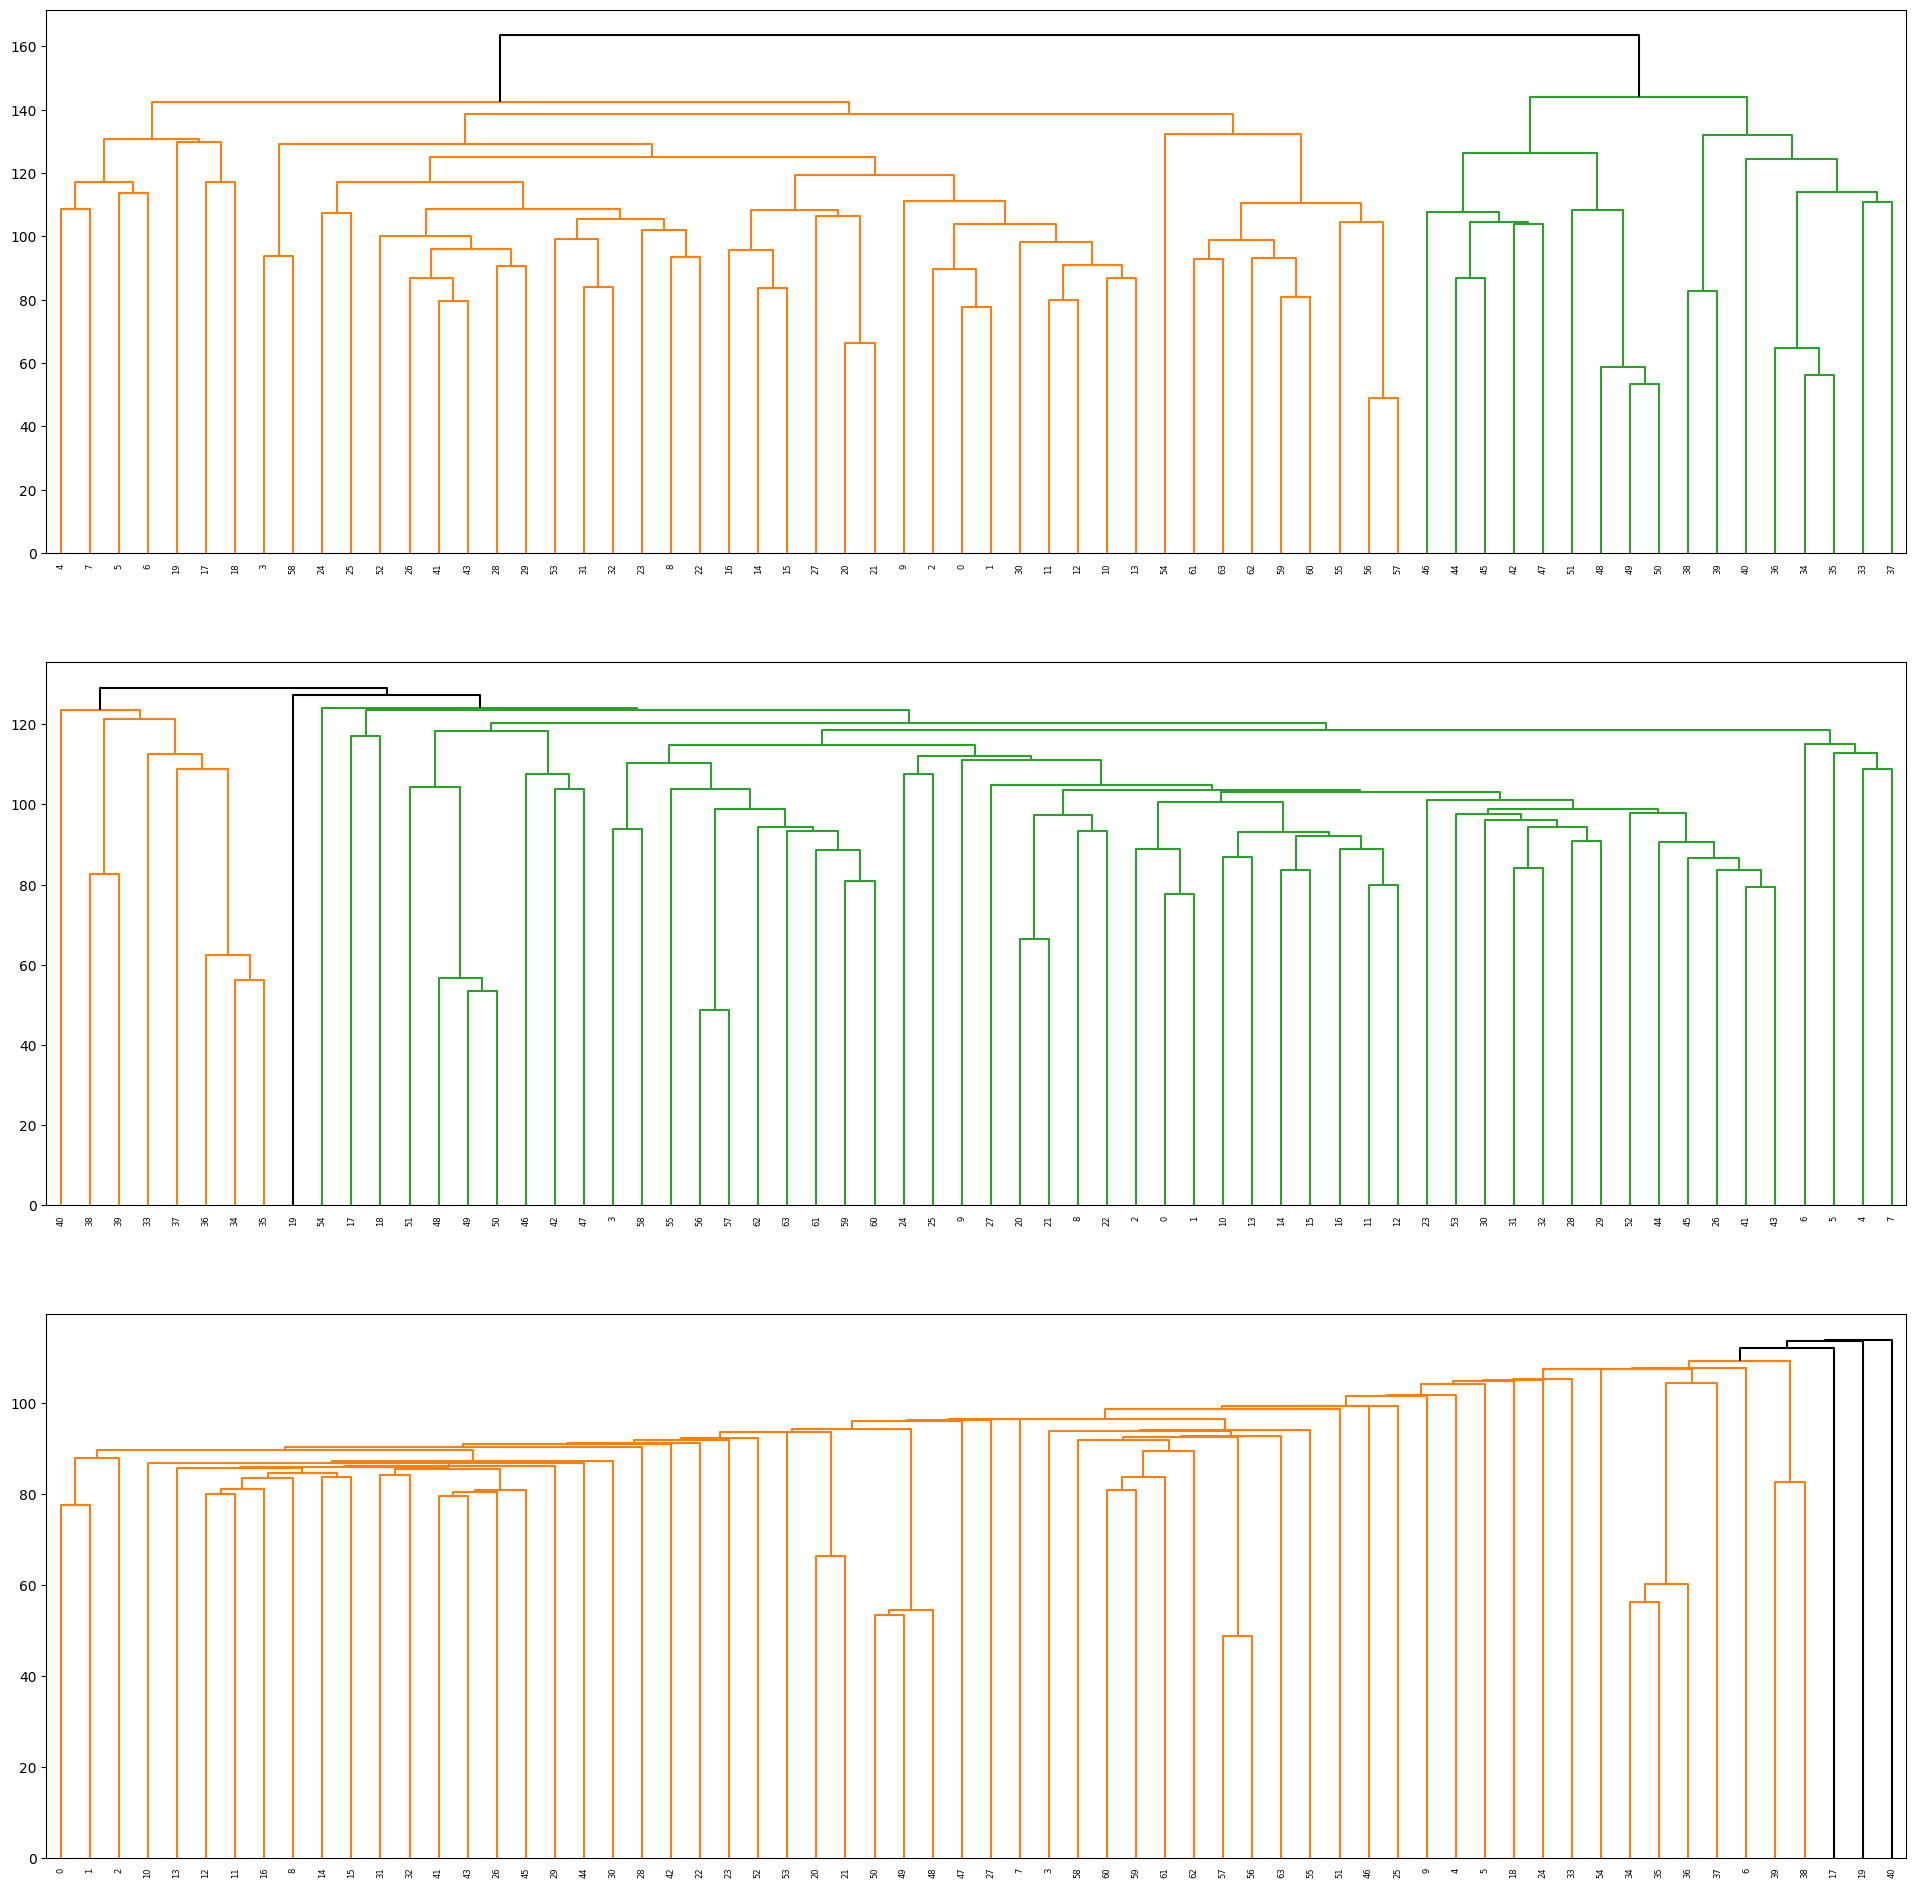

In [158]:
fig, axes = plt.subplots(3, 1, figsize=(24, 24))
dendrogram(
    linkage_comp_scale, ax=axes[0], color_threshold=150, above_threshold_color="black"
)
dendrogram(
    linkage_avg_scale, ax=axes[1], color_threshold=125, above_threshold_color="black"
)
dendrogram(
    linkage_sing_scale, ax=axes[2], color_threshold=110, above_threshold_color="black"
)
plt.show()

5. Analyze the results and the effect of the linkage

6. Cut the dendrogram at the height that will yield a particular
four clusters

In [159]:
cut = cut_tree(linkage_comp_scale, n_clusters=4).T[0]
cut

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We claimed earlier that
$K$-means clustering and hierarchical clustering with the dendrogram
cut to obtain the same number of clusters can yield very different
results. 

7. Perform $K$-means clustering with $K=4$?

In [160]:
nci_kmeans = KMeans(n_clusters=4, random_state=42, n_init=20).fit(NCI60_scaled)

8. Are the clusters the same ? You can perform a cross-table. What do you observe ?

In [161]:
pd.crosstab(
    pd.Series(cut, name="HClust"), pd.Series(nci_kmeans.labels_, name="K-means")
)

K-means,0,1,2,3
HClust,,,,
0,9,2,0,29
1,0,0,0,7
2,0,0,8,0
3,0,9,0,0


## Exercise 2 
We wil work on the datasets contining some ifnormation about Mass, Height?Wdth for severals types of fruits. 

1. Import the data Orange_Lemmons.csv
2. Plot the data
3. Perform hierarchical clustering using
complete linkage
4. How many clusters do you want to keep ? Cut the Dendogramm and perform a cross-table to compare.
5.  Perform a K-means methode with two clusters. Analyse the results.

In [162]:
Orange_Lemon = pd.read_csv("data/Orange_Lemmons.csv", index_col=0)
Orange_Lemon

,Mass,Height,width
Label,,,
1,192,8.4,7.3
1,180,8.0,6.8
1,176,7.4,7.2
2,86,6.2,4.7
2,84,6.0,4.6
2,80,5.8,4.3
2,80,5.9,4.3
2,76,5.8,4.0
3,178,7.1,7.8


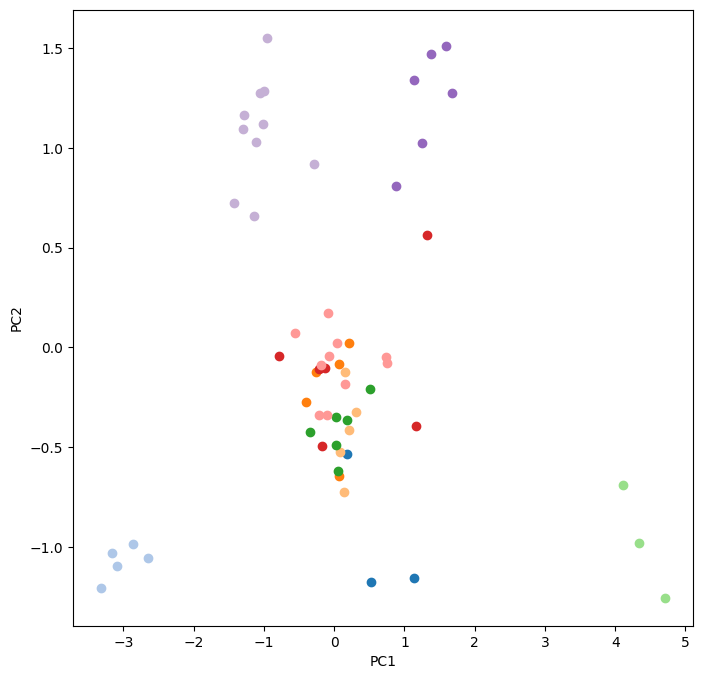

In [163]:
scaler = StandardScaler(with_std=True, with_mean=True)
Orange_Lemon_scaled = scaler.fit_transform(Orange_Lemon)
covariance_matrix = np.cov(Orange_Lemon_scaled, rowvar=False)

pcaOrange_Lemon_scaled = PCA()
scores = pcaOrange_Lemon_scaled.fit_transform(Orange_Lemon_scaled)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
colors = plt.get_cmap("tab20").colors
for i, label in enumerate(Orange_Lemon.index.unique()):
    indices = np.where(Orange_Lemon.index == label)[0]
    ax.scatter(
        scores[indices, 0],
        scores[indices, 1],
        color=colors[i],
        label=label,
    )
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

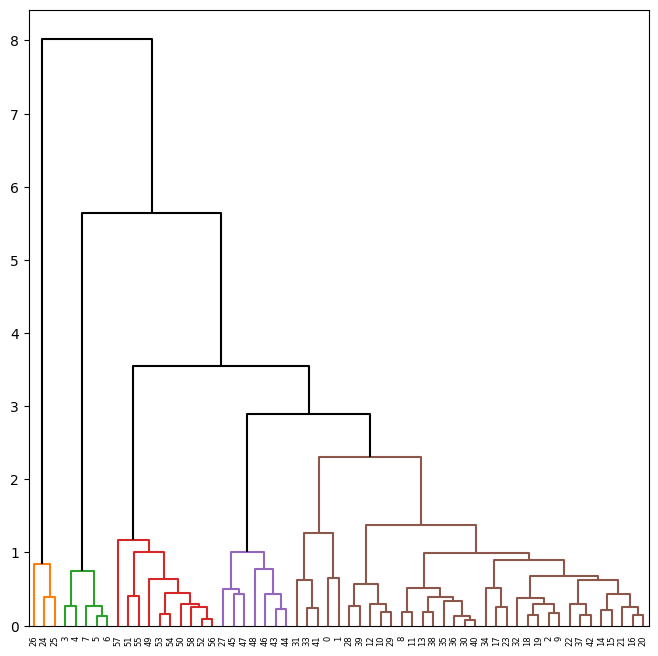

In [167]:
HClust = AgglomerativeClustering

hc_comp_scale = HClust(distance_threshold=0, n_clusters=None, linkage="complete").fit(
    Orange_Lemon_scaled
)
linkage_comp_scale = compute_linkage(hc_comp_scale)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(
    linkage_comp_scale, ax=ax, color_threshold=2.5, above_threshold_color="black"
)
plt.show()